

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>



# Passo 4. Análise exploratória de dados.

Thaynnan Aurick Silva e Souza.

Data: 29/11/2024.


# 1 Bibliotecas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 Lendo dados.

In [3]:
# Fazendo a leitura dos dados.
df_trips_amount = pd.read_csv("/datasets/project_sql_result_01.csv")
df_trips_amount.head() # sanity check

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


# 3 informações gerais.

In [4]:
# Verificando dados.
df_trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


* Tudo como deve estar.

# 4 Lendo dados.

In [5]:
# Fazendo a leitura dos dados.
df_local_avg = pd.read_csv("/datasets/project_sql_result_04.csv")
df_local_avg.head() # sanity check

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


# 6 informações gerais.

In [6]:
# Verificando dados.
df_local_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Foi notado que a coluna "average_trips" se encontra como tipo "float" e será necessário transforma-la para tipo "int" 

# 6.2 Alterando dados.

In [7]:
# Alterando tipo de dados da coluna "average_trips" de "float" para "int" para facilitar o tratamento do dados futuramente. 
df_local_avg['average_trips'] = df_local_avg['average_trips'].round(0).astype(int)
df_local_avg.head() # sanity check

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


Vi que os dados da coluna "average_trips" estavam como tipo "float" para mehlor trabalhar com os dados e ja que frações de segundos não seriam muito relevantes a minha analise decidi arrendonda-los e transforma-los no tipo "int".


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



In [8]:
# Selecionando os dados das 10 empresas de taxís com maior numero de corridas.
top_10 = df_local_avg.nlargest(10, 'average_trips')
print(top_10)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9524
2         Streeterville           6665
3             West Loop           5164
4                O'Hare           2547
5             Lake View           2421
6            Grant Park           2069
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1260


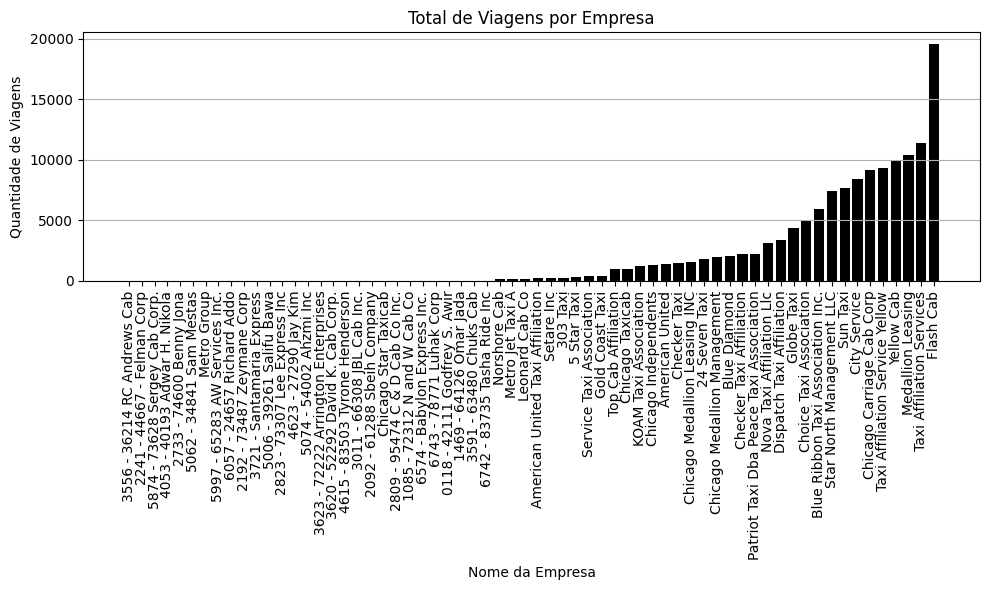

In [9]:
grouped_data = df_trips_amount.groupby('company_name')['trips_amount'].sum().reset_index()

# Ordenando os dados pela quantidade de viagens em ordem decrescente
grouped_data = grouped_data.sort_values(by='trips_amount', ascending=True)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['company_name'], grouped_data['trips_amount'], color='black')
plt.title('Total de Viagens por Empresa')
plt.xlabel('Nome da Empresa')
plt.ylabel('Quantidade de Viagens')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Conclusões 
Foi possivel análisar o número de corridas atravéz do gráfico que apontou que as empresas que mais obtiveram corridas foram:

1 Flash Cab que obterve uma grande vantagem referente as demais empresas.

2 Taxi Affiliation Services que obteve um pouco mais da metade do número de corridas da primeira colocada.

3 Medallion Leasing que se aproximou dos numeros da segunda colocada com apenas uma pequena diferença no total de corridas

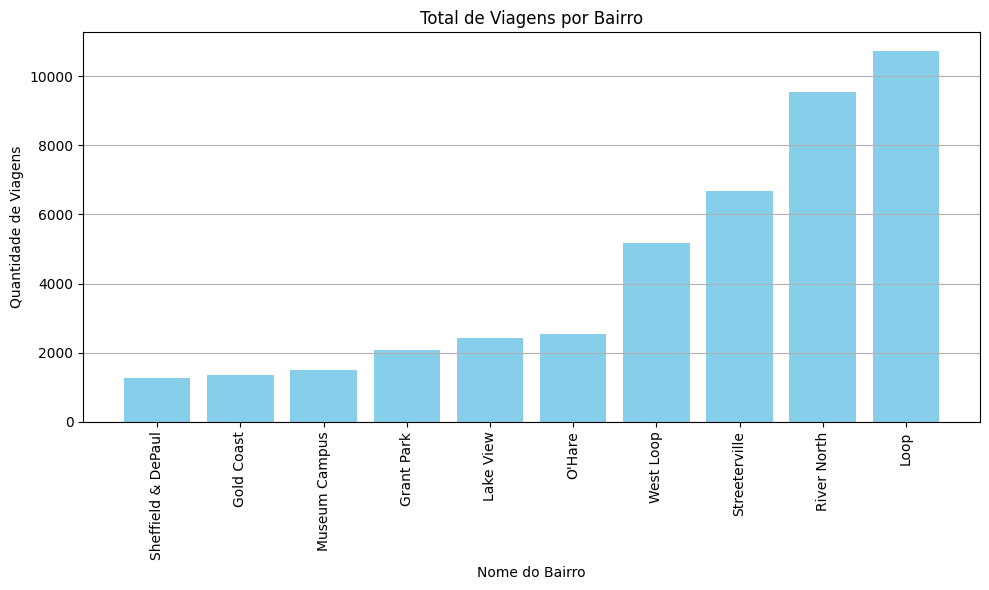

In [10]:
# Agrupando dados
grouped_data_top_10 = top_10.groupby('dropoff_location_name')['average_trips'].sum().reset_index()

# Ordenando os dados pela quantidade de viagens em ordem crescente
grouped_data_top_10 = grouped_data_top_10.sort_values(by='average_trips', ascending=True)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_top_10['dropoff_location_name'], grouped_data_top_10['average_trips'], color='skyblue')
plt.title('Total de Viagens por Bairro')
plt.xlabel('Nome do Bairro')
plt.ylabel('Quantidade de Viagens')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Conclusões 
Ao análisar o gráfico podemos notas que os 3 bairros que mais obtiveram corridas foram:

1 Loop com suas 10727 corridas. 

2 River North com 9524 corridas.

3 Streeterville com 6665 corridas.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Para as visualizações é importante garantir que elas ilustrarem os comportamentos de forma ordenada e decrescente, para que fiquem claros os bairros e empresas que mais se destacam. Pode fazer esse ajuste por favor?
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>


# 7 Testando hipóteses.

# 8 Lendo os dados.

In [11]:
# Fazendo a leitura dos dados.
df_condition = pd.read_csv("/datasets/project_sql_result_07.csv")
df_condition.head() # sanity check

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


# 9 Informações gerais.

In [12]:
# Verificando dados.
df_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


* Foi notado que na coluna "start_ts" o tipo dos dados se encontram como "object" quando deviam ser do tipo "DateTime".

# 9.2 Alterando dados.

In [13]:
# Transformando dados da coluna "start_ts" de "object" para "DateTime" ja que se trata de dados com datas.
df_condition['start_ts'] = pd.to_datetime(df_condition['start_ts'])
df_condition.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [14]:
# Adicionando a coluna com os dias da semana.
df_condition['day_of_week'] = df_condition['start_ts'].dt.dayofweek
df_condition.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [15]:
# Alterando tipo de dados da coluna "duration_seconds" de "float" para "int" para facilitar o tratamento do dados futuramente. 
#df_condition['duration_seconds'] = df_condition['duration_seconds'].round(0).astype(int)
#df_condition.info()

# Filtrando os dados.

In [20]:
# Fitrando dados para teste de variância.
df_saturday = df_condition[df_condition['day_of_week'] == 5 ]
df_saturday_good = df_saturday[df_saturday['weather_conditions'] == 'Good' ]
df_saturday_bad = df_saturday[df_saturday['weather_conditions'] == 'Bad' ]
print(df_saturday_good)

                start_ts weather_conditions  duration_seconds  day_of_week
0    2017-11-25 16:00:00               Good            2410.0            5
1    2017-11-25 14:00:00               Good            1920.0            5
2    2017-11-25 12:00:00               Good            1543.0            5
3    2017-11-04 10:00:00               Good            2512.0            5
4    2017-11-11 07:00:00               Good            1440.0            5
...                  ...                ...               ...          ...
1062 2017-11-11 06:00:00               Good            1500.0            5
1063 2017-11-25 11:00:00               Good               0.0            5
1064 2017-11-11 10:00:00               Good            1318.0            5
1065 2017-11-11 13:00:00               Good            2100.0            5
1066 2017-11-11 08:00:00               Good            1380.0            5

[888 rows x 4 columns]


# Teste de hipótese 

* Calculando médias e níveis de variância.

In [17]:
# Calculando variância para dias "bons".
var_saturday_good = df_saturday_good.var()
print(var_saturday_good)

duration_seconds    576382.00969
day_of_week              0.00000
dtype: float64


In [18]:
# Calculando variância para dias "ruins".
var_saturday_bad = df_saturday_bad.var()
print(var_saturday_bad)

duration_seconds    520294.086002
day_of_week              0.000000
dtype: float64


* A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos ?

Hipótese nula (H0): A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos.

Hipótese alternativa (H1): A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [21]:
# Teste as hipóteses
from scipy import stats as st
import numpy as np

alpha = 0.05 # nivel crítico de significancia estatística.

# Se o valor-p for menor que alpha rejeitamos a hipotese nula.
results = st.ttest_ind(df_saturday_good['duration_seconds'], df_saturday_bad['duration_seconds'], equal_var=True) # executando um teste.

print('valor-p:', results.pvalue)# extraindo valor-p.

if results.pvalue < alpha: # comparando o valor- com o limiar.
    print('Rejeitamos a hipotese nula')
    
else:
    print('Não podemos rejeitar a hipotese nula')


valor-p: 6.517970327099473e-12
Rejeitamos a hipotese nula



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Precisamos realizar um ajuste aqui! O teste t deve receber como inputs as duas amostras que terão suas médias testadas, e não a média em si. Esse ajuste nos levará a resultados bem diferentes. Pode verificar por favor?
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Teste devidamente ajustado!
</div>


# Conclusões

Descartamos a hipótese nula a resposta para a questão e :

A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare mudam nos sábados chuvosos.